In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.ticker import NullFormatter
from pylab import savefig 
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about vehicle collisions in Seattle City, USA. The data set includes details of accidents due to collisions that resulted either in Property damage or an injury. It includes following fields, which have been chosen for this project scope & model building:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Severity Desc  | Describes an accident - either Property Damage or Injury Collision                    |
| Weather        | Weather condition at the time of the accident                                |
| Road Cond      | Road Condition at the time of the accident |
| Light Cond     | Visibility Condition at the time of the accident                        |
| Incident Date  | Date of the accident                |
| Address type   | Place of the accident : Block / Intersection                                                                      |
| X              | Latitude                                                                |
| Y        | Longitude                                                               |

### Load Data From CSV File  

In [2]:
# Training Dataset loaded from local directory

df = pd.read_csv('Collision_data_train_1k.csv')
df.head()


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.shape

(1000, 38)

### Convert to date time object 

In [ ]:
# # Convert to_date time object
# df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

# # Now see the incident date column values changed to 
# # yyyy-mm-dd 00:00:00

## Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [4]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    709
Injury Collision                  291
Name: SEVERITYDESC, dtype: int64

709 accidents belong to the category 'Property Damage Collisions' while 291 are 'Injury Collisions' 


Lets plot some columns to underestand data better:

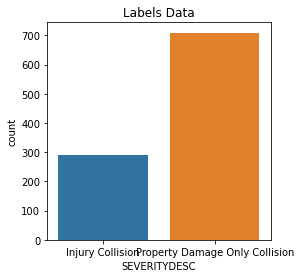

In [5]:
#plot the dataset multiclass labels

plt.figure(figsize=(4, 4))
sns.countplot('SEVERITYDESC', data=df)
plt.title('Labels Data')
plt.savefig("SeverityDesc.png")
plt.show()


### Feature selection

#### Drop non-relevant columns and fill the blank values in categorical columns with appropriate values

In [6]:
# Drop non-relevant columns

df.drop(["SEVERITYCODE","INCKEY", "COLDETKEY", "REPORTNO", "STATUS", "INTKEY", "SEVERITYCODE.1",
           "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INCDATE", "INCDTTM",
           "SDOT_COLCODE", "PEDROWNOTGRNT","SDOTCOLNUM", "SPEEDING", "JUNCTIONTYPE",
            "ST_COLCODE", "LOCATION","SEGLANEKEY", "CROSSWALKKEY", "HITPARKEDCAR",
            "INATTENTIONIND","UNDERINFL", "ST_COLDESC","OBJECTID","COLLISIONTYPE",
            "COLLISIONTYPE", "SDOT_COLDESC","EXCEPTRSNCODE","EXCEPTRSNDESC"
         ],
        axis=1, inplace=True)

In [7]:
# Replace blank cells with appropriate values
df['X'].fillna(-122.332385,inplace=True)        # Replace with Mean
df['Y'].fillna(47.617034, inplace=True)         # Replace with Mean
df['WEATHER'].fillna('Clear', inplace=True)      # Replace with Mode
df['ROADCOND'].fillna('Dry', inplace=True)       # Replace with Mode
df['LIGHTCOND'].fillna('Daylight', inplace=True) # Replace with Mode
df['ADDRTYPE'].fillna('Block', inplace=True)     # Replace with Mode


In [8]:
# print and see that there are no missing values
print ("Missing values in X Latitude :", df['X'].isnull().sum())
print ("Missing values in Y Longitude:", df['Y'].isnull().sum())
print ("Missing values in Weather    :", df['WEATHER'].isnull().sum())
print ("Missing values in Road  Cond :", df['ROADCOND'].isnull().sum())
print ("Missing values in Light Cond :", df['LIGHTCOND'].isnull().sum())
print ("Missing values in AddressType:", df['ADDRTYPE'].isnull().sum())

Missing values in X Latitude : 0
Missing values in Y Longitude: 0
Missing values in Weather    : 0
Missing values in Road  Cond : 0
Missing values in Light Cond : 0
Missing values in AddressType: 0


### Frequencies of categorical variables

In [9]:
df.groupby(['WEATHER'])['SEVERITYDESC'].value_counts(normalize=True)

WEATHER                   SEVERITYDESC                  
Clear                     Property Damage Only Collision    0.681885
                          Injury Collision                  0.318115
Fog/Smog/Smoke            Injury Collision                  1.000000
Other                     Property Damage Only Collision    0.600000
                          Injury Collision                  0.400000
Overcast                  Property Damage Only Collision    0.744361
                          Injury Collision                  0.255639
Raining                   Property Damage Only Collision    0.708333
                          Injury Collision                  0.291667
Sleet/Hail/Freezing Rain  Property Damage Only Collision    1.000000
Snowing                   Property Damage Only Collision    1.000000
Unknown                   Property Damage Only Collision    0.946429
                          Injury Collision                  0.053571
Name: SEVERITYDESC, dtype: float64

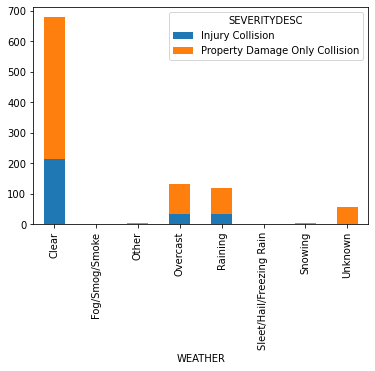

In [10]:
# Stacked freuency chart displaying the frequency of Weather conditions and its 
# impact on target label 'severity' 

df.groupby(['WEATHER','SEVERITYDESC']).size().unstack().plot(kind='bar',stacked=True)

plt.savefig("FreqChartWeatherSt.jpg")
plt.show()

In [11]:
df.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts(normalize=True)

ROADCOND    SEVERITYDESC                  
Dry         Property Damage Only Collision    0.686684
            Injury Collision                  0.313316
Ice         Property Damage Only Collision    1.000000
Snow/Slush  Property Damage Only Collision    1.000000
Unknown     Property Damage Only Collision    0.916667
            Injury Collision                  0.083333
Wet         Property Damage Only Collision    0.727811
            Injury Collision                  0.272189
Name: SEVERITYDESC, dtype: float64

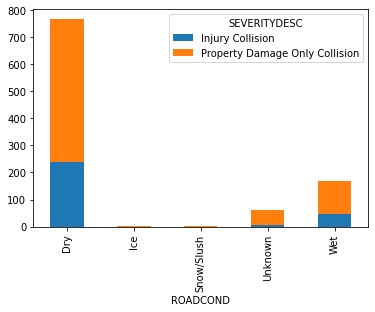

In [12]:
# Stacked freuency chart displaying the frequency of road conditions and its 
# impact on target label 'severity' 
df.groupby(['ROADCOND','SEVERITYDESC']).size().unstack().plot(kind='bar',stacked=True)

plt.savefig("FreqChartRoadSt.png")
plt.show()

In [13]:
df.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYDESC                  
Dark - No Street Lights   Property Damage Only Collision    1.000000
Dark - Street Lights Off  Injury Collision                  0.500000
                          Property Damage Only Collision    0.500000
Dark - Street Lights On   Property Damage Only Collision    0.729469
                          Injury Collision                  0.270531
Dark - Unknown Lighting   Property Damage Only Collision    1.000000
Dawn                      Property Damage Only Collision    0.615385
                          Injury Collision                  0.384615
Daylight                  Property Damage Only Collision    0.690616
                          Injury Collision                  0.309384
Dusk                      Property Damage Only Collision    0.611111
                          Injury Collision                  0.388889
Other                     Property Damage Only Collision    1.000000
Unknown                   Property Damage Only

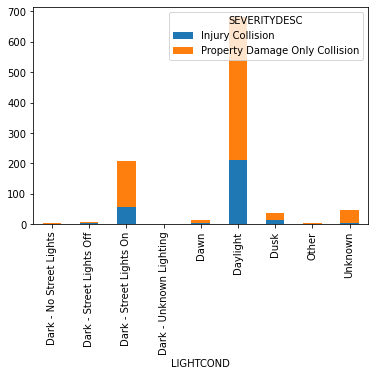

In [14]:
# Stacked freuency chart displaying the frequency of Light conditions and its 
# impact on target label 'severity' 
df.groupby(['LIGHTCOND','SEVERITYDESC']).size().unstack().plot(kind='bar',stacked=True)

plt.savefig("FreqChartLightSt.png")
plt.show()

In [15]:
df.groupby(['ADDRTYPE'])['SEVERITYDESC'].value_counts(normalize=True)

ADDRTYPE      SEVERITYDESC                  
Alley         Property Damage Only Collision    1.000000
Block         Property Damage Only Collision    0.766917
              Injury Collision                  0.233083
Intersection  Property Damage Only Collision    0.587879
              Injury Collision                  0.412121
Name: SEVERITYDESC, dtype: float64

<Figure size 900x450 with 0 Axes>

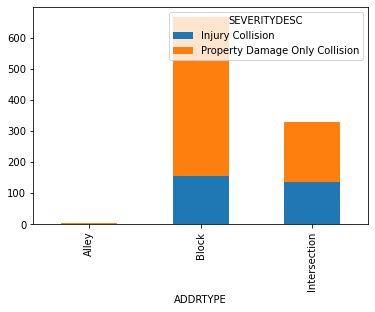

In [17]:
# Stacked freuency chart displaying the frequency of Light conditions and its 
# impact on target label 'severity' 

fig = plt.figure(figsize=(6, 3), dpi=150)
df.groupby(['ADDRTYPE','SEVERITYDESC']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
fig.tight_layout()
fig.savefig('FreqChartAddrSt.png', dpi=200) 
plt.show()

### One Hot Encoding - convert categorical features to numerical values

#### Feature before One Hot Encoding

In [18]:
df[['WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE']].head()


,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE
0,Overcast,Wet,Daylight,Intersection
1,Raining,Wet,Dark - Street Lights On,Block
2,Overcast,Dry,Daylight,Block
3,Clear,Dry,Daylight,Block
4,Raining,Wet,Daylight,Intersection


##### Use one hot encoding technique to convert categorical varables to binary variables and append them to the Feature DataFrame 

In [19]:
### select the features for model building

Features = df[['WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE']]
Features.head()

,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE
0,Overcast,Wet,Daylight,Intersection
1,Raining,Wet,Dark - Street Lights On,Block
2,Overcast,Dry,Daylight,Block
3,Clear,Dry,Daylight,Block
4,Raining,Wet,Daylight,Intersection


In [20]:
# One Hot Encoding for categorical variables 

Features = pd.get_dummies(df, columns = ['WEATHER', 'ROADCOND', 'LIGHTCOND','ADDRTYPE'], drop_first = True)

Features.head()

,X,Y,SEVERITYDESC,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Raining,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,...,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,ADDRTYPE_Block,ADDRTYPE_Intersection
0,-122.323148,47.703140,Injury Collision,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,-122.347294,47.647172,Property Damage Only Collision,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-122.334540,47.607871,Property Damage Only Collision,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,-122.334803,47.604803,Property Damage Only Collision,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,-122.306426,47.545739,Injury Collision,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [21]:
# Drop the target label from the features

Features.drop(['SEVERITYDESC'],axis=1, inplace=True)


In [22]:
Features.head()


,X,Y,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Raining,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Ice,...,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,ADDRTYPE_Block,ADDRTYPE_Intersection
0,-122.323148,47.703140,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,-122.347294,47.647172,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-122.334540,47.607871,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,-122.334803,47.604803,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,-122.306426,47.545739,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### Feature selection

Lets defind feature sets, X:

In [23]:
X = Features
X[0:5]

,X,Y,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Raining,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Ice,...,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,ADDRTYPE_Block,ADDRTYPE_Intersection
0,-122.323148,47.703140,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,-122.347294,47.647172,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-122.334540,47.607871,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,-122.334803,47.604803,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,-122.306426,47.545739,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


What are our lables?

In [24]:
# Values in the target label
y = df['SEVERITYDESC'].values
y[0:5]

array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [25]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.24164564,  1.47750141, -0.0316386 , -0.07088812,  2.55319349,
        -0.36927447, -0.0316386 , -0.07088812, -0.24356115, -0.04476615,
        -0.0548546 , -0.25264558,  2.21746697, -0.0776931 , -0.51091491,
        -0.0316386 , -0.11476596,  0.6828438 , -0.19324699, -0.06337243,
        -0.21958604, -1.40892676,  1.42488702],
       [-0.57229783,  0.48192672, -0.0316386 , -0.07088812, -0.39166636,
         2.7080128 , -0.0316386 , -0.07088812, -0.24356115, -0.04476615,
        -0.0548546 , -0.25264558,  2.21746697, -0.0776931 ,  1.95727307,
        -0.0316386 , -0.11476596, -1.46446375, -0.19324699, -0.06337243,
        -0.21958604,  0.7097601 , -0.70181003],
       [-0.1423582 , -0.21717382, -0.0316386 , -0.07088812,  2.55319349,
        -0.36927447, -0.0316386 , -0.07088812, -0.24356115, -0.04476615,
        -0.0548546 , -0.25264558, -0.450965  , -0.0776931 , -0.51091491,
        -0.0316386 , -0.11476596,  0.6828438 , -0.19324699, -0.06337243,
        -0.21958604,  0.7097

# Classification 

Now, let's use the training set to build an accurate model. Then use the test set to report the accuracy of the model. 

Let's use scikit-learn, Scipy or Numpy libraries for developing the classification algorithms. Let's use the following algorithms:

- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression


## Train Test Split

In [26]:
# Split the data set into training subset and testing subset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train Set :', X_train.shape, y_train.shape)
print('Test Set :', X_test.shape, y_test.shape)

Train Set : (800, 23) (800,)
Test Set : (200, 23) (200,)


## K Nearest Neighbor(KNN)
Find the best k to build the model with the best accuracy. We will use the Collision_data_train1k.csv for finding the best k

In [27]:
# Classifier implementing the k-nearest neighbors

from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

[0.605 0.59  0.63  0.59  0.63  0.62  0.655 0.63  0.665 0.655 0.675]


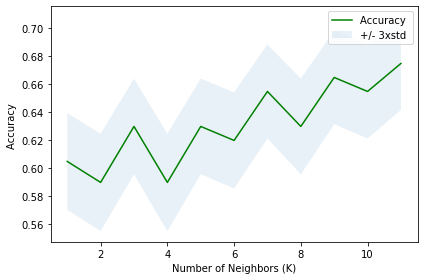

The best accuracy was with 0.675 with k= 11


In [28]:
# Let's try with 10 different values of k to find the best one
Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

# accuracy
print(mean_acc)

# Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# result
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1 )

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

# import library
from sklearn.tree import DecisionTreeClassifier

# create an instance of the classifier DecisionTreeClassifier called CollisionTree
CollisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
CollisionTree # shows the default parameters

# training the model by fitting the classifier object CollisionTree
# Fit the data with training feature matrix X_trainset and trainig response vector y_trainset
CollisionTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
# Let's make some predictions on the testing dataset and store it into a variable named predTree

predTree =  CollisionTree.predict(X_test)

In [31]:
# Let's print out Collision Tree and y_test to visually compare the prediction to the actual values.

print(predTree[0:5])
print(y_test[0:5])

['Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision' 'Injury Collision'
 'Property Damage Only Collision']
['Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision' 'Injury Collision' 'Injury Collision']


In [32]:
# Let's import metrics from sklearn to check the accuracy of our Decison Tree Model

import matplotlib.pyplot as plt
print("Decison Tree's accuracy: ", metrics.accuracy_score(y_test, predTree))

Decison Tree's accuracy:  0.65


In [33]:
# Install pydotplus and graphviz libraries for visualization
# It will take a few minutes, please wait !

!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          23 KB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-pyhd1c1de3_3



pydotplus-2.0.2      | 23 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==>

In [34]:
# Let's visualize the decision tree

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline


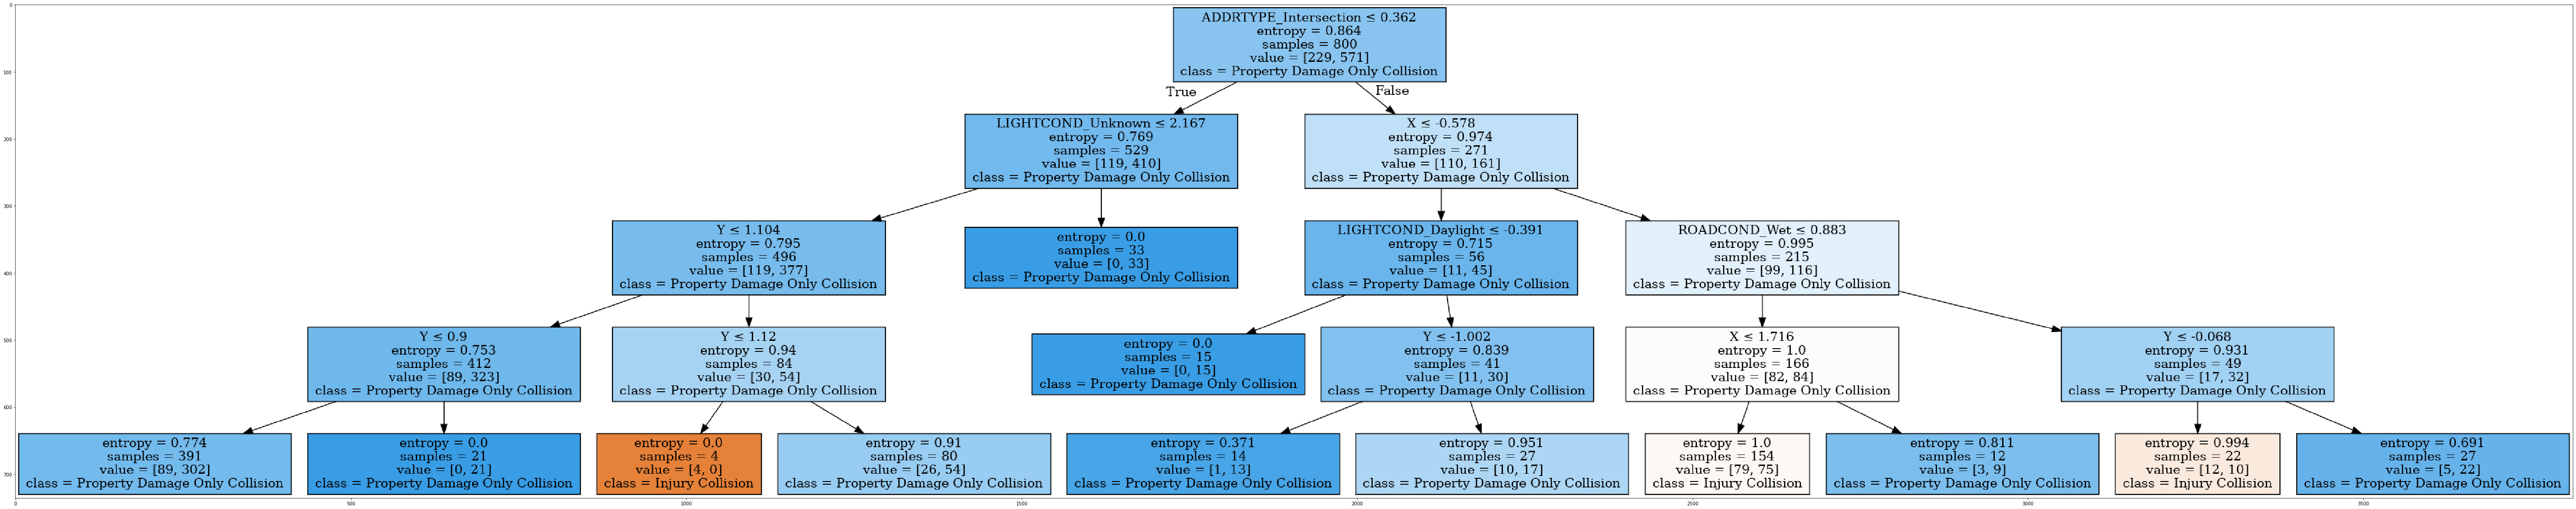

In [36]:
dot_data =  StringIO()
filename = 'DecisionTree.png'
featureNames = Features.columns[0:23]
targetNames =  df["SEVERITYDESC"].unique().tolist()
out = tree.export_graphviz(CollisionTree, feature_names = featureNames, out_file = dot_data, class_names = np.unique(y_train), filled=True,
                                                                                                                      special_characters = True,
                                                                                                                      rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.savefig("DecisionTree1.jpg")
plt.imshow(img, interpolation ='nearest')

# Support Vector Machine

#### mapping data into higher dimensional space - kernelling

In [37]:
# import library
from sklearn import svm

# train the model by fitting the classifier SVC to the subsets of the 
# main data set i.e. fit it to datasets X_train, y_train
# Let's just use the default RBF (Radial Basis Function) for this project
# -----------------------------------------------------------------------

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) # fit the classifier object to the training dataset

#  We can use the model to predict test set
# -----------------------------------------
yhat = clf.predict(X_test) 
yhat [0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array(['Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision'], dtype=object)

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion Matrix',
                          cmap  = plt.cm.Blues):
    
# This function prints and plots the confusion matrix.
# Normalization can be applied by setting 'normalize=True
   
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
            horizontalalignment = "center",
            color = "white" if cm[i, j] > thresh else "black")
                                  
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')                             

                                precision    recall  f1-score   support

              Injury Collision       0.00      0.00      0.00        62
Property Damage Only Collision       0.69      0.99      0.81       138

                     micro avg       0.68      0.68      0.68       200
                     macro avg       0.34      0.49      0.40       200
                  weighted avg       0.47      0.68      0.56       200

Confusion matrix without normalization
[[  0  62]
 [  2 136]]


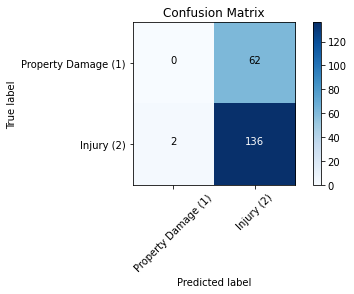

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

# Compute Cofusion Matrix

cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat))

# plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage (1)','Injury (2)'], normalize=False, title = 'Confusion Matrix')

In [40]:
# using f1_score from sklearn library

from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')


0.5585714285714286

In [41]:
# using jaccard index for accuracy

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.68

In [42]:
print("Avg F1-Score : %.4f" %f1_score(y_test, yhat, average='weighted'))
print("Jaccard Score: %.4f" %jaccard_similarity_score(y_test, yhat))

Avg F1-Score : 0.5586
Jaccard Score: 0.6800


# Logistic Regression

In [43]:
# import library
from sklearn.linear_model import LogisticRegression

# training the model using logistic regression classifier.
# assign the classifier to object LR

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

# using the model fitted above, predict the labels for the Feature (X_test).
yhat = LR.predict(X_test)
yhat

array(['Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage O

## Model Evaluation using Test set

Out of Sample Accuracy is the percentage of correct predictions that the model makes on 
data that the model has NOT been trained on. Doing a train and test on the same dataset 
will most likely have a low out-of-sample accuracy due to likelihood of being over-fit.

In [44]:
# import metrics 
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### Load Test set for evaluation 

In [45]:
# load test dataset from local directory

test_df = pd.read_csv('Collision_data_test_05k.csv')
test_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,-122.377103,47.676000,218949,307830,309110,3751072,Matched,Block,NaN,...,Wet,Dawn,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
1,1,-122.360743,47.702400,218951,309145,310425,E879254,Matched,Intersection,37116.0,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
2,2,-122.317690,47.701288,218952,309602,310882,E881917,Matched,Intersection,37489.0,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,6,Pedalcyclist Strikes Moving Vehicle,0,0,N
3,1,-122.332845,47.602661,218953,311330,312690,3814539,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,12,From same direction - both going straight - on...,0,0,N
4,2,-122.341806,47.686934,218954,309123,310403,E858797,Matched,Intersection,24228.0,...,Dry,Dark - Street Lights On,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N


#### Pre-processing Collision_data_test (out-of-sample dataset)

In [46]:
# Drop non-relevant columns

test_df.drop(["SEVERITYCODE","INCKEY", "COLDETKEY", "REPORTNO", "STATUS", "INTKEY", "SEVERITYCODE.1",
           "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INCDATE", "INCDTTM",
           "SDOT_COLCODE", "PEDROWNOTGRNT","SDOTCOLNUM", "SPEEDING", "JUNCTIONTYPE",
            "ST_COLCODE", "LOCATION","SEGLANEKEY", "CROSSWALKKEY", "HITPARKEDCAR",
            "INATTENTIONIND","UNDERINFL", "ST_COLDESC","OBJECTID","COLLISIONTYPE",
            "COLLISIONTYPE", "SDOT_COLDESC","EXCEPTRSNCODE","EXCEPTRSNDESC"
         ],
        axis=1, inplace=True)

In [47]:
test_df.head()

,X,Y,ADDRTYPE,SEVERITYDESC,WEATHER,ROADCOND,LIGHTCOND
0,-122.377103,47.676000,Block,Property Damage Only Collision,Clear,Wet,Dawn
1,-122.360743,47.702400,Intersection,Property Damage Only Collision,Overcast,Dry,Daylight
2,-122.317690,47.701288,Intersection,Injury Collision,Overcast,Wet,Dark - Street Lights On
3,-122.332845,47.602661,Block,Property Damage Only Collision,Clear,Wet,Dark - Street Lights On
4,-122.341806,47.686934,Intersection,Injury Collision,Clear,Dry,Dark - Street Lights On


In [48]:
test_df.shape

(509, 7)

### Handle Missing Values in the categorical columns

In [49]:
# Replace blank cells with appropriate values
test_df['X'].fillna(-122.332385,inplace=True)        # Replace with Mean
test_df['Y'].fillna(47.617034, inplace=True)         # Replace with Mean

test_df['WEATHER'].fillna('Clear', inplace=True)      # Replace with Mode
test_df['ROADCOND'].fillna('Dry', inplace=True)       # Replace with Mode
test_df['LIGHTCOND'].fillna('Daylight', inplace=True) # Replace with Mode
test_df['ADDRTYPE'].fillna('Block', inplace=True)     # Replace with Mode

In [50]:
print ("Missing values in X Latitude :", test_df['X'].isnull().sum())
print ("Missing values in Y Longitude:", test_df['Y'].isnull().sum())
print ("Missing values in Weather    :", test_df['WEATHER'].isnull().sum())
print ("Missing values in Road  Cond :", test_df['ROADCOND'].isnull().sum())
print ("Missing values in Light Cond :", test_df['LIGHTCOND'].isnull().sum())
print ("Missing values in AddressType:", test_df['ADDRTYPE'].isnull().sum())

Missing values in X Latitude : 0
Missing values in Y Longitude: 0
Missing values in Weather    : 0
Missing values in Road  Cond : 0
Missing values in Light Cond : 0
Missing values in AddressType: 0


### One Hot Encoding & FEATURE selection

In [51]:
# Feature Selection and converting categorical values to numerical values 
# using one-hot-encoding

Feature_test = pd.get_dummies(test_df, columns = ['WEATHER', 'ROADCOND', 'LIGHTCOND','ADDRTYPE'], drop_first = True)


In [52]:
Feature_test.head()

,X,Y,SEVERITYDESC,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Raining,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,...,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,ADDRTYPE_Block,ADDRTYPE_Intersection
0,-122.377103,47.676000,Property Damage Only Collision,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,-122.360743,47.702400,Property Damage Only Collision,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-122.317690,47.701288,Injury Collision,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,-122.332845,47.602661,Property Damage Only Collision,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,-122.341806,47.686934,Injury Collision,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [53]:
# drop target label y (SEVERITYDESC) from the features
Feature_test.drop(['SEVERITYDESC'],axis=1, inplace=True)

In [54]:
Feature_test.head()

,X,Y,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Raining,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Ice,...,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,ADDRTYPE_Block,ADDRTYPE_Intersection
0,-122.377103,47.676000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,-122.360743,47.702400,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-122.317690,47.701288,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,-122.332845,47.602661,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,-122.341806,47.686934,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [55]:
# Feature seletion from the test dataset
test_X = Feature_test
test_X = preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-1.71,  1.05, -0.08, -0.1 , -0.47, -0.63, -0.04, -0.09, -0.15,
        -0.04, -0.06, -0.19,  1.16, -0.06, -0.76, -0.04, 10.04, -1.08,
        -0.2 , -0.06, -0.16,  0.84, -0.83],
       [-1.11,  1.5 , -0.08, -0.1 ,  2.14, -0.63, -0.04, -0.09, -0.15,
        -0.04, -0.06, -0.19, -0.86, -0.06, -0.76, -0.04, -0.1 ,  0.93,
        -0.2 , -0.06, -0.16, -1.19,  1.2 ],
       [ 0.49,  1.48, -0.08, -0.1 ,  2.14, -0.63, -0.04, -0.09, -0.15,
        -0.04, -0.06, -0.19,  1.16, -0.06,  1.32, -0.04, -0.1 , -1.08,
        -0.2 , -0.06, -0.16, -1.19,  1.2 ],
       [-0.07, -0.22, -0.08, -0.1 , -0.47, -0.63, -0.04, -0.09, -0.15,
        -0.04, -0.06, -0.19,  1.16, -0.06,  1.32, -0.04, -0.1 , -1.08,
        -0.2 , -0.06, -0.16,  0.84, -0.83],
       [-0.4 ,  1.24, -0.08, -0.1 , -0.47, -0.63, -0.04, -0.09, -0.15,
        -0.04, -0.06, -0.19, -0.86, -0.06,  1.32, -0.04, -0.1 , -1.08,
        -0.2 , -0.06, -0.16, -1.19,  1.2 ]])

In [56]:
# target label selection y from the test dataset
test_y = test_df['SEVERITYDESC'].values
test_y[0:5]


array(['Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

## KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier 
# predicted y for KNN classifier
yhat_knn = neigh.predict(test_X)

In [58]:
# jaccard evaluation metric
jaccard_knn = jaccard_similarity_score(test_y, yhat_knn)
print("KNN Jaccard index: ", jaccard_knn)

KNN Jaccard index:  0.6365422396856582


In [59]:
# f1_score evaluation metric
f1_score_knn = f1_score(test_y, yhat_knn, average='weighted')
print("KNN F1-score: ", f1_score_knn)

KNN F1-score:  0.5895936090023156


### Decision tree

In [60]:
# predicted y for Decision Tree classifier
yhat_dt = CollisionTree.predict(test_X)

# jaccard
jaccard_dt = jaccard_similarity_score(test_y, yhat_dt)
print("D-Tree Jaccard index: ", jaccard_dt)

# f1_score
f1_score_dt = f1_score(test_y, yhat_dt, average='weighted')
print("D-Tree F1-score: ", f1_score_dt)

D-Tree Jaccard index:  0.6286836935166994
D-Tree F1-score:  0.6235758089401287


### SVM

In [61]:
# predicted y for SVM classifier
yhat_svm = clf.predict(test_X)

# jaccard evaluation metric
jaccard_svm = jaccard_similarity_score(test_y, yhat_svm)
print("SVM Jaccard index: ", jaccard_svm)

# f1_score evaluation metric
f1_score_svm = f1_score(test_y, yhat_svm, average='weighted')
print("SVM F1-score: ", f1_score_svm)

SVM Jaccard index:  0.7033398821218074
SVM F1-score:  0.582466015413446


### Logistic regression

In [62]:
# predicted y for Logistic Regression classifier
yhat_logreg = LR.predict(test_X)
yhat_logreg_prob = LR.predict_proba(test_X)

# jaccard
jaccard_logreg = jaccard_similarity_score(test_y, yhat_logreg)
print("LR Jaccard index: ", jaccard_logreg)

# f1_score
f1_score_logreg = f1_score(test_y, yhat_logreg, average='weighted')
print("LR F1-score: ", f1_score_logreg)

# logloss
logloss_logreg = log_loss(test_y, yhat_logreg_prob)
print("LR log loss: ", logloss_logreg)


LR Jaccard index:  0.7013752455795678
LR F1-score:  0.5884915707870504
LR log loss:  0.601363790587472


# Report
Now, we will be able to report the accuracy of the built model, using different evaluation metrics:

In [63]:
# Create a table using 'list' and 'dataframe' to store the values (scores) 
jaccard_list  = [jaccard_knn, jaccard_dt, jaccard_svm, jaccard_logreg]
f1_score_list = [f1_score_knn, f1_score_dt, f1_score_svm, f1_score_logreg]
log_list = ["NA","NA","NA",logloss_logreg]
accuracyReport = pd.DataFrame(jaccard_list, index=["KNN","Decision Tree","SVM","Logistic Regression"])


In [64]:
# Insert scores in the table created in the previous step, for respective columns (score headings)
accuracyReport.columns = ["Jaccard"]
accuracyReport.insert(loc=1, column="F1_score",value=f1_score_list)
accuracyReport.insert(loc=2, column="LogLoss",value=log_list)
accuracyReport.columns.name = "Algorithm"
accuracyReport

Algorithm,Jaccard,F1_score,LogLoss
KNN,0.636542,0.589594,NA
Decision Tree,0.628684,0.623576,NA
SVM,0.703340,0.582466,NA
Logistic Regression,0.701375,0.588492,0.601364


# Thank you for viewing